<img src="../imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **Tutorial de Pytorch 7:  clasificador dataset MNIST**

En este notebook debes crear un clasificador para el dataset MNIST. Este dataset está compuesto por imágenes de dígitos escritos a mano. Cada imagen tiene un tamaño de 28x28 píxeles y está etiquetada con el dígito que representa. El dataset se divide en dos partes: un conjunto de entrenamiento con 60.000 imágenes y un conjunto de test con 10.000 imágenes.


In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Definimos las transformaciones para normalizar los datos
# Las imágenes originales están en escala de grises con valores entre 0.0 y 1.0
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertimos imágenes a Tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos con media 0.5 y desviación estándar 0.5
])

# Cargamos el dataset MNIST
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print("Máximo valor de la imagen:", train_data[0][0].squeeze().max())
print("Mínimo valor de la imagen:",train_data[0][0].squeeze().min())

# DataLoader para los conjuntos de entrenamiento y prueba
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


Máximo valor de la imagen: tensor(1.)
Mínimo valor de la imagen: tensor(-1.)


La normalización de las imágenes se realiza restando la media y dividiendo por la desviación estándar.

$$
\text{imagen} = \frac{\text{imagen} - \text{media}}{\text{desviación estándar}}
$$

Así que si los valores de las imágenes están entre 0 y 1, cuando el valor sea 0 (mínimo) se convertirá en -1 y cuando sea 1 (máximo) se convertirá en 1.

1.0 -1.0
1.0 0.0


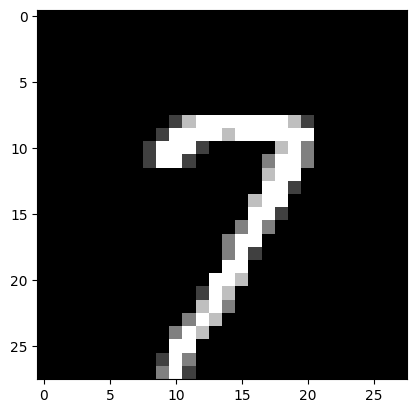

In [10]:
# Vamos a visualizar una imagen del dataset
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos una imagen del dataset
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Convertimos la imagen a numpy y "desaplanamos"/redimensionamos si es necesario
# Además, deshacemos la normalización aplicada previamente
image = images[0].numpy().squeeze()  # Eliminamos dimensiones de tamaño 1

print(image.max(), image.min())
image = (image * 0.5) + 0.5  # Deshacemos la normalización
print(image.max(), image.min())

# Visualizamos la imagen
plt.imshow(image, cmap='gray')
plt.show()


A partir de ahora trabajaremos con minilotes, no con el dataset completo. En este caso, el tamaño del minilote será de 64 imágenes.

In [11]:
for images, labels in train_loader:
    print("Tamaño del batch de imágenes:", images.shape)
    print("Tamaño del batch de etiquetas:", labels.shape)
    break

Tamaño del batch de imágenes: torch.Size([64, 1, 28, 28])
Tamaño del batch de etiquetas: torch.Size([64])
